In [1]:
from main import *

/Users/dex/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


In [80]:
labels = get_annotations("""DHF=='DHF' or DSS=='DSS'""",
                """DF=='DF'""",
                         """Dengue_Acute=="Dengue_Acute" or Dengue_Early_Acute=='Dengue_Early_Acute' or Dengue_Late_Acute == 'Dengue_Late_Acute' or Dengue_DOF < 10""")
labels['annotation'] = None
for label in "df", "dhf", "dss":
    labels.annotation[labels[label]==label]=label

labels['code'] = labels.gsm_name + "_" + labels.gpl_name + "_" + labels.gse_name
labels = labels.set_index('code')

/Users/dex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
from analysis import combat
combat_matrix, samples  = combat(labels)
combat_matrix.to_csv("combat_dengue.csv")
# combat_matrix.to_csv("combat_brain.csv")
samples.to_csv("combat_dengue_samples.csv")



1/10 GSE17924 GPL4133
2/10 GSE18090 GPL570
3/10 GSE25001 GPL6104
4/10 GSE25226 GPL5621
5/10 GSE38246 GPL15615
6/10 GSE40628 GPL16021
7/10 GSE43777 GPL201
8/10 GSE43777 GPL570
9/10 GSE51808 GPL13158
Found 9 batches
Adjusting for 2 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


In [86]:
samples = samples.set_index('index')

In [88]:
combat_matrix.columns.intersection(labels.index)

Index([u'GSM303278_GPL2700_GSE13052', u'GSM303281_GPL2700_GSE13052',
       u'GSM303283_GPL2700_GSE13052', u'GSM303284_GPL2700_GSE13052',
       u'GSM303589_GPL2700_GSE13052', u'GSM303590_GPL2700_GSE13052',
       u'GSM305287_GPL2700_GSE13052', u'GSM305289_GPL2700_GSE13052',
       u'GSM305291_GPL2700_GSE13052', u'GSM305303_GPL2700_GSE13052', 
       ...
       u'GSM1253046_GPL13158_GSE51808', u'GSM1253047_GPL13158_GSE51808',
       u'GSM1253048_GPL13158_GSE51808', u'GSM1253049_GPL13158_GSE51808',
       u'GSM1253050_GPL13158_GSE51808', u'GSM1253051_GPL13158_GSE51808',
       u'GSM1253052_GPL13158_GSE51808', u'GSM1253053_GPL13158_GSE51808',
       u'GSM1253054_GPL13158_GSE51808', u'GSM1253055_GPL13158_GSE51808'],
      dtype='object', length=606)

In [90]:
joint_index = combat_matrix.columns.intersection(labels.index)
labels = labels.ix[joint_index]
combat_matrix = combat_matrix[joint_index]

In [12]:
import scipy.stats as stats

In [100]:
def getAnova(row):
    
    return stats.f_oneway(combat_matrix[labels.query("""annotation=='df'""").index].ix[row],
                   combat_matrix[labels.query("""annotation=='dhf'""").index].ix[row],
                   combat_matrix[labels.query("""annotation=='dss'""").index].ix[row])

In [122]:
best = pd.read_csv('severe_dengue_top.10000_perm.results.csv')\
.set_index(['mygene_sym', 'mygene_entrez'])\
.query('random_TE < -0.07 or random_TE > 0.07')\
.query('random_rank == 0 and fixed_rank == 0')

In [133]:
combat_matrix

,,GSM303278_GPL2700_GSE13052,GSM303281_GPL2700_GSE13052,GSM303283_GPL2700_GSE13052,GSM303284_GPL2700_GSE13052,GSM303589_GPL2700_GSE13052,GSM303590_GPL2700_GSE13052,GSM305287_GPL2700_GSE13052,GSM305289_GPL2700_GSE13052,GSM305291_GPL2700_GSE13052,GSM305303_GPL2700_GSE13052,...,GSM1253046_GPL13158_GSE51808,GSM1253047_GPL13158_GSE51808,GSM1253048_GPL13158_GSE51808,GSM1253049_GPL13158_GSE51808,GSM1253050_GPL13158_GSE51808,GSM1253051_GPL13158_GSE51808,GSM1253052_GPL13158_GSE51808,GSM1253053_GPL13158_GSE51808,GSM1253054_GPL13158_GSE51808,GSM1253055_GPL13158_GSE51808
mygene_sym,mygene_entrez,,,,,,,,,,,,,,,,,,,,,
AAMP,14,5.313293,5.306955,5.313033,5.315878,5.487877,5.228450,5.433251,5.294901,5.539167,5.525753,...,4.996680,4.857502,5.372051,5.391715,5.446319,5.463397,5.358629,5.299483,5.252760,5.231384
ABCA7,10347,4.481061,4.241306,4.349910,4.539813,4.584712,4.772285,4.370334,4.400481,4.085296,4.394223,...,4.907157,4.773385,4.341188,4.462564,4.266048,4.138271,4.445549,4.552814,4.896538,4.747054
ABLIM1,3983,4.870565,5.077056,4.599774,5.057001,4.995071,4.835811,4.647649,5.334572,5.016359,4.909045,...,4.969888,5.040738,5.260232,4.639357,4.318067,4.663088,4.260045,4.970086,5.155865,4.854754
ABR,29,5.045189,4.958500,4.492300,4.768854,4.488961,4.969082,4.899272,4.702724,4.481910,4.542542,...,5.153065,5.165027,4.654393,4.572772,4.232279,4.737082,4.807189,4.829960,5.142810,4.782335
ACAA1,30,5.996795,5.946410,5.856330,5.718172,5.704018,5.709076,5.949770,5.992140,6.022561,5.834197,...,5.910767,5.900299,5.691421,5.536243,5.599532,5.495014,5.868728,5.642809,5.893866,6.184703
ACAA2,10449,5.271799,5.607203,5.518297,5.788147,5.697975,5.375010,5.697434,5.510809,6.009282,5.832295,...,5.014843,5.011179,5.604070,5.711099,5.582858,5.975954,5.502146,5.722930,5.672445,6.020213
ACADVL,37,6.598079,6.455527,6.887263,6.475106,6.617134,6.073358,6.530107,6.633648,6.795419,6.624506,...,6.093394,6.224843,6.608223,6.879560,6.785138,6.667236,6.662144,6.671199,6.534341,6.327547
ACOT7,11332,4.425962,4.326600,4.454489,4.509208,4.367101,4.342336,4.160141,4.385105,4.200775,4.262134,...,4.003241,3.976781,4.355279,4.461099,4.364695,4.482755,4.169491,4.399912,3.911558,4.674320
ACP1,52,5.147003,5.670801,5.562998,5.635719,5.564948,5.446047,5.737248,5.328216,6.073720,5.924316,...,4.739249,4.961656,5.674567,5.783057,5.859581,5.767285,5.450058,5.665644,5.229014,5.701170


In [160]:
best_combat = best_combat[combat_matrix.columns]

In [161]:
best_combat

,,GSM303278_GPL2700_GSE13052,GSM303281_GPL2700_GSE13052,GSM303283_GPL2700_GSE13052,GSM303284_GPL2700_GSE13052,GSM303589_GPL2700_GSE13052,GSM303590_GPL2700_GSE13052,GSM305287_GPL2700_GSE13052,GSM305289_GPL2700_GSE13052,GSM305291_GPL2700_GSE13052,GSM305303_GPL2700_GSE13052,...,GSM1253046_GPL13158_GSE51808,GSM1253047_GPL13158_GSE51808,GSM1253048_GPL13158_GSE51808,GSM1253049_GPL13158_GSE51808,GSM1253050_GPL13158_GSE51808,GSM1253051_GPL13158_GSE51808,GSM1253052_GPL13158_GSE51808,GSM1253053_GPL13158_GSE51808,GSM1253054_GPL13158_GSE51808,GSM1253055_GPL13158_GSE51808
mygene_sym,mygene_entrez,,,,,,,,,,,,,,,,,,,,,
ALDH1A1,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG1,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPI,671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMP,820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEACAM6,4680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEACAM8,1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTSG,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEFA1B,728358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEFA3,1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
gses

NameError: name 'gses' is not defined

In [153]:
row

(('ALDH1A1', 216), C                                   14587.93
 H                                   3.401104
 H_lower                             2.614406
 H_upper                             4.424526
 I2                                 0.9135509
 I2_lower                           0.8536967
 I2_upper                           0.9489182
 Q                                   80.97254
 Q_df                                       7
 caseDataCount                            183
 controlDataCount                         343
 fixed_TE                         -0.03467904
 fixed_lower                      -0.04621593
 fixed_pval                      3.826927e-09
 fixed_se                         0.005886278
 fixed_upper                      -0.02314215
 fixed_zscore                       -5.891506
 k                                          8
 predict_TE                       -0.08298243
 predict_lower                     -0.2707706
 predict_pval                       0.3211069
 predict_se     

In [152]:
pd.DataFrame([(row[0],
               row[1], 
               getAnova(row)[0], 
               getAnova(row)[1]) 
              for row in best_combat.iterrows()], 
             columns = ("Gene", "id", "f", "p")).sort('p')

KeyError: ('ALDH1A1', 216)

In [139]:
best_combat = best.join(combat_matrix)

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X = combat.T
y = labels.outcome.replace("df", 0).replace("dhf", 1).replace("dss", 2)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

Automatically created module for IPython interactive environment


In [9]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [10]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [11]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Populating the interactive namespace from numpy and matplotlib


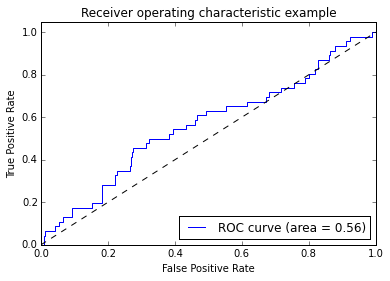

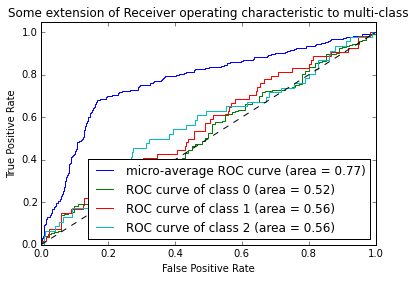

In [12]:
%pylab inline
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()